In [2]:
import pandas as pd
# import data
data = pd.read_csv('US_graduate_schools_admission_parameters_dataset.csv')
# drop the serial no.
data.drop(columns='Serial No.', inplace=True)
research_data = data.Research
data.drop(columns='Research', inplace=True)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
0,337,118,4,4.5,4.5,9.65,0.92
1,324,107,4,4.0,4.5,8.87,0.76
2,316,104,3,3.0,3.5,8.00,0.72
3,322,110,3,3.5,2.5,8.67,0.80
4,314,103,2,2.0,3.0,8.21,0.65


In [3]:
# feature scaling - use the method in Andrew Ng course
index = data.columns
for idx in index:
    data[idx] = (data[idx] - data[idx].mean()) / data[idx].std()
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
0,1.759903,1.744786,0.797829,1.092496,1.165861,1.762611,1.371930
1,0.626871,-0.067551,0.797829,0.595907,1.165861,0.454582,0.249984
2,-0.070379,-0.561824,-0.076504,-0.397271,0.052867,-1.004373,-0.030503
3,0.452559,0.426723,-0.076504,0.099318,-1.060127,0.119190,0.530470
4,-0.244691,-0.726582,-0.950838,-1.390450,-0.503630,-0.652212,-0.521354


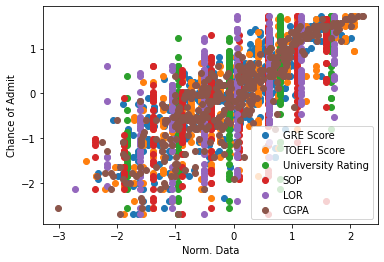

In [4]:
# Data visualization
import matplotlib.pyplot as plt
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
for x in range(6):
    plt.scatter(data[index[x]], data[index[-1]], c=colors[x], label=index[x])
plt.xlabel('Norm. Data')
plt.ylabel('Chance of Admit')
plt.legend()

In [32]:
# define variables
import numpy as np
n = len(index) - 1 # num of features
m = len(data[index[0]]) # num of data samples
alpha = 0.03 # step size
theta = np.random.rand(n+1)
X = data[index[:-1]]
X = np.c_[np.ones(X.shape[0]), X]
# print(X.shape)
y = data[index[-1]]
iteration = 1000

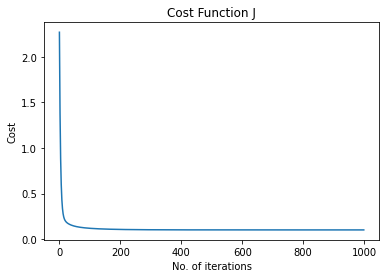

Gradient Descent: 0.00, 0.18,0.12, 0.05, -0.01, 0.14, 0.50


In [33]:
# Gradient Descent
def gradient_descent(X, Y, theta, alpha, iteration):
    cost_vals = []
    theta_vals = [theta]
    for _ in range(iteration):
        prediction = np.dot(X, theta)
        error = prediction - Y
        cost = 1/ (2*m) * np.dot(error.T, error)
        theta = theta - alpha * (1 / m) * np.dot(X.T, error)
        cost_vals.append(cost)
        theta_vals.append(theta)
    return theta_vals, cost_vals

theta_vals, cost_vals = gradient_descent(X, y, theta, alpha, iteration)

# Check the iteraction process
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(cost_vals)
plt.show()

theta = theta_vals[-1]
print("Gradient Descent: {:.2f}, {:.2f},{:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}".format(theta[0], theta[1], theta[2], theta[3], theta[4], theta[5], theta[6]))

In [ ]:
# Resutls visualization

In [ ]:
# credits
# Andrew Ng
# https://www.kaggle.com/sashankmvv/graduate-admission-predict/notebook
# https://www.kaggle.com/tentotheminus9/linear-regression-from-scratch-gradient-descent/notebook